<a href="https://colab.research.google.com/github/Ayusha-Burman/Loan_Prediction/blob/main/Loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive


In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Training Data

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
import numpy as np

warnings.filterwarnings("ignore")
sns.set(style="white", color_codes=True)

path_train = '/content/gdrive/MyDrive/Machine_learning/Loan_prediction/Loan_pred_train.csv'
loan_pred_train = pd.read_csv(path_train)
print(loan_pred_train.tail(10))

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
604  LP002959  Female     Yes          1      Graduate            No   
605  LP002960    Male     Yes          0  Not Graduate            No   
606  LP002961    Male     Yes          1      Graduate            No   
607  LP002964    Male     Yes          2  Not Graduate            No   
608  LP002974    Male     Yes          0      Graduate            No   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
604            12000                0.0       496.0             360.0   
605             2400             3800.0         NaN          

In [4]:
print(loan_pred_train.shape)

(614, 13)


In [5]:
loan_pred_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
loan_pred_train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [7]:
loan_pred_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         600 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
loan_pred_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           14
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Education, ApplicantIncome, CoapplicantIncome, Property_Area, Loan_Status do not have any null entries
Gender contains 13 null entries
Married contains 03 null entries
Dependents contains 14 null entiries
Self_Employed contains 32 null entries
LoanAmount contains 22 null entries
Loan_Amount_Term contains 14 null entries
Credit_History contains 50 null entries

In [9]:
# Running value counts on Gender for train
loan_pred_train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
loan_pred_train['Gender'] = loan_pred_train['Gender'].fillna('unknown')

In [11]:
# Value counts after fillna
loan_pred_train['Gender'].value_counts()

Male       489
Female     112
unknown     13
Name: Gender, dtype: int64

In [12]:
loan_pred_train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [13]:
loan_pred_train['Married'] = loan_pred_train['Married'].fillna('unknown')


In [14]:
loan_pred_train['Married'].value_counts()


Yes        398
No         213
unknown      3
Name: Married, dtype: int64

In [15]:
# Running value counts on Dependents for train
loan_pred_train['Dependents'].value_counts()

0     346
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [16]:
loan_pred_train['Dependents'] = loan_pred_train['Dependents'].fillna('0')


In [17]:
loan_pred_train['Dependents'] = loan_pred_train['Dependents'].replace({'3+':3})


In [18]:
loan_pred_train['Dependents'].value_counts()


0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [19]:
loan_pred_train['Self_Employed'].value_counts()


No     500
Yes     82
Name: Self_Employed, dtype: int64

In [20]:
loan_pred_train['Self_Employed'] = loan_pred_train['Self_Employed'].fillna('unknown')

In [21]:
loan_pred_train['Self_Employed'].value_counts()


No         500
Yes         82
unknown     32
Name: Self_Employed, dtype: int64

In [22]:
np.mean(loan_pred_train['Loan_Amount_Term'])


342.0

In [23]:
# Replacing null values with mean of data
loan_pred_train['Loan_Amount_Term'] = loan_pred_train['Loan_Amount_Term'].fillna(342.0)

In [24]:
loan_pred_train['Loan_Amount_Term'].isnull().sum()


0

In [25]:
loan_pred_train['Credit_History'].value_counts()


1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [26]:
# Creating additional category
loan_pred_train['Credit_History'] = loan_pred_train['Credit_History'].fillna(1.0)

In [27]:
loan_pred_train['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

In [28]:
np.mean(loan_pred_train['LoanAmount'])


146.41216216216216

In [29]:
loan_pred_train['LoanAmount'] = loan_pred_train['LoanAmount'].fillna(146.4)


In [30]:
loan_pred_train['LoanAmount'].isnull().sum()


0

In [31]:
loan_pred_train.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [32]:
loan_pred_train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [33]:
mylist_train = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area' , 'Loan_Status']

In [34]:
for i in mylist_train:
    loan_pred_train[i] = loan_pred_train[i].astype({i:'category'})

In [35]:
loan_pred_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            614 non-null    object  
 1   Gender             614 non-null    category
 2   Married            614 non-null    category
 3   Dependents         614 non-null    category
 4   Education          614 non-null    category
 5   Self_Employed      614 non-null    category
 6   ApplicantIncome    614 non-null    int64   
 7   CoapplicantIncome  614 non-null    float64 
 8   LoanAmount         614 non-null    float64 
 9   Loan_Amount_Term   614 non-null    float64 
 10  Credit_History     614 non-null    category
 11  Property_Area      614 non-null    category
 12  Loan_Status        614 non-null    category
dtypes: category(8), float64(3), int64(1), object(1)
memory usage: 30.0+ KB


In [36]:
loan_pred_train['Loan_Status'].value_counts(normalize=True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

In [37]:
loan_pred_train['Gender'] = loan_pred_train['Gender'].replace({'Male':0, 'Female':1,'unknown' : 2})


In [38]:
loan_pred_train['Married'] = loan_pred_train['Married'].replace({'Yes' :1, 'No': 0, 'unknown':2})


In [39]:
loan_pred_train['Education'] = loan_pred_train['Education'].replace ({'Graduate' : 1, 'Not Graduate' : 0})


In [40]:
loan_pred_train['Self_Employed'] = loan_pred_train['Self_Employed'].replace ({'Yes': 1,'No' : 0, 'unknown':2})


In [41]:
loan_pred_train['Property_Area'] = loan_pred_train['Property_Area'].replace ({'Semiurban': 1,'Urban' : 0, 'Rural':2})


In [42]:
loan_pred_train['Loan_Status'] = loan_pred_train['Loan_Status'].replace({'Y':1, 'N':0})


#Plotting graphs

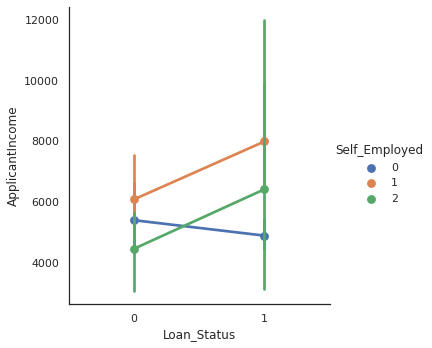

In [43]:
sns.factorplot('Loan_Status','ApplicantIncome', data=loan_pred_train, hue='Self_Employed')


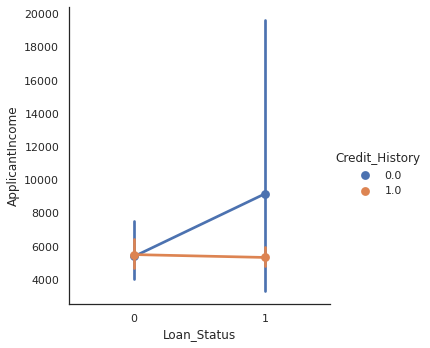

In [44]:
sns.factorplot('Loan_Status','ApplicantIncome', data=loan_pred_train,hue='Credit_History')


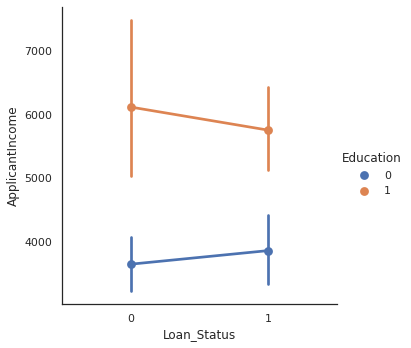

In [45]:
sns.factorplot('Loan_Status','ApplicantIncome', data=loan_pred_train,hue='Education')


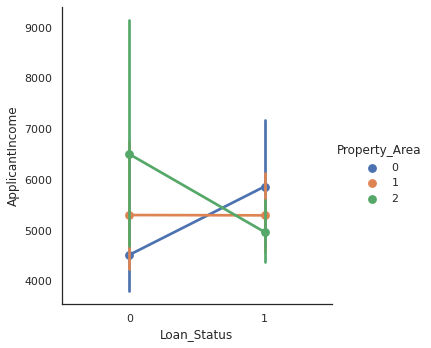

In [46]:
sns.factorplot('Loan_Status','ApplicantIncome', data=loan_pred_train, hue='Property_Area')


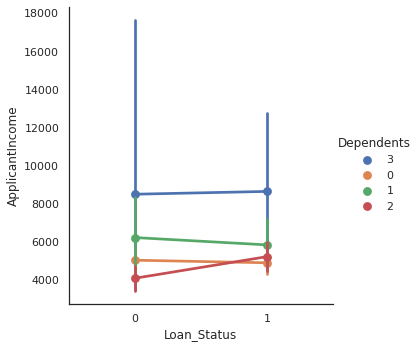

In [47]:
sns.factorplot('Loan_Status','ApplicantIncome', data=loan_pred_train, hue='Dependents')


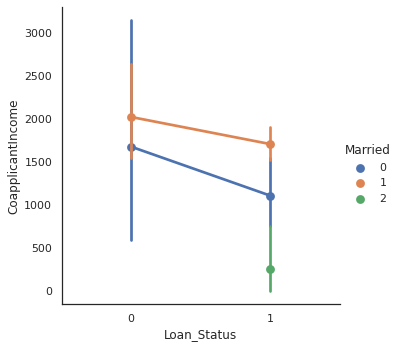

In [48]:
sns.factorplot('Loan_Status','CoapplicantIncome', data=loan_pred_train, hue='Married')


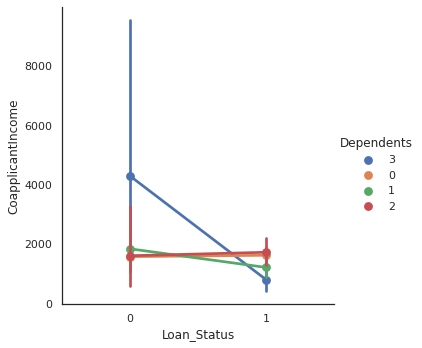

In [49]:
sns.factorplot('Loan_Status','CoapplicantIncome', data=loan_pred_train, hue='Dependents')


#Testing Data

In [50]:
path_test = '/content/gdrive/MyDrive/Machine_learning/Loan_prediction/Loan_pred_test.csv'
loan_pred_test = pd.read_csv(path_test)
print(loan_pred_test.tail(10))

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
357  LP002952    Male      No          0      Graduate            No   
358  LP002954    Male     Yes          2  Not Graduate            No   
359  LP002962    Male      No          0      Graduate            No   
360  LP002965  Female     Yes          0      Graduate            No   
361  LP002969    Male     Yes          1      Graduate            No   
362  LP002971    Male     Yes         3+  Not Graduate           Yes   
363  LP002975    Male     Yes          0      Graduate            No   
364  LP002980    Male      No          0      Graduate            No   
365  LP002986    Male     Yes          0      Graduate            No   
366  LP002989    Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
357             2500                  0        60.0             360.0   
358             3132                  0        76.0          

In [51]:
print(loan_pred_test.shape)

(367, 12)


In [52]:
loan_pred_test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [53]:
loan_pred_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [54]:
loan_pred_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [55]:
loan_pred_test['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [56]:
loan_pred_test['Gender'] = loan_pred_test['Gender'].fillna('unknown')

In [57]:
loan_pred_test['Gender'].value_counts()

Male       286
Female      70
unknown     11
Name: Gender, dtype: int64

In [58]:
loan_pred_test['Married'].value_counts()

Yes    233
No     134
Name: Married, dtype: int64

In [59]:
loan_pred_test['Married'] = loan_pred_test['Married'].fillna('unknown')

In [60]:
loan_pred_test['Married'].value_counts()

Yes    233
No     134
Name: Married, dtype: int64

In [61]:
loan_pred_test['Dependents'].value_counts()

0     200
2      59
1      58
3+     40
Name: Dependents, dtype: int64

In [62]:
loan_pred_test['Dependents'] = loan_pred_test['Dependents'].fillna('0')


In [63]:
loan_pred_test['Dependents'] = loan_pred_test['Dependents'].replace({'3+':3})


In [64]:
loan_pred_test['Dependents'].value_counts()

0    210
2     59
1     58
3     40
Name: Dependents, dtype: int64

In [65]:
loan_pred_test['Self_Employed'].value_counts()


No     307
Yes     37
Name: Self_Employed, dtype: int64

In [66]:
loan_pred_test['Self_Employed'] = loan_pred_test['Self_Employed'].fillna('unknown')

In [67]:
loan_pred_test['Self_Employed'].value_counts()

No         307
Yes         37
unknown     23
Name: Self_Employed, dtype: int64

In [68]:
np.mean(loan_pred_test['Loan_Amount_Term'])

342.53739612188366

In [69]:
loan_pred_test['Loan_Amount_Term'] = loan_pred_train['Loan_Amount_Term'].fillna(342.53739612188366)

In [70]:
loan_pred_test['Loan_Amount_Term'].isnull().sum()

0

In [71]:
loan_pred_test['Credit_History'].value_counts()

1.0    279
0.0     59
Name: Credit_History, dtype: int64

In [72]:
loan_pred_test['Credit_History'] = loan_pred_test['Credit_History'].fillna(1.0)

In [73]:
np.mean(loan_pred_test['LoanAmount'])

136.13259668508286

In [74]:
loan_pred_test['LoanAmount'] = loan_pred_test['LoanAmount'].fillna(136.13)

In [75]:
loan_pred_test['LoanAmount'].isnull().sum()

0

In [76]:
loan_pred_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [77]:
loan_pred_test['Property_Area'].value_counts()

Urban        140
Semiurban    116
Rural        111
Name: Property_Area, dtype: int64

In [78]:
mylist_test = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

In [79]:
for j in mylist_test:
  loan_pred_test[j] = loan_pred_test[j].astype({j:'category'})


In [80]:
loan_pred_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Loan_ID            367 non-null    object  
 1   Gender             367 non-null    category
 2   Married            367 non-null    category
 3   Dependents         367 non-null    category
 4   Education          367 non-null    category
 5   Self_Employed      367 non-null    category
 6   ApplicantIncome    367 non-null    int64   
 7   CoapplicantIncome  367 non-null    int64   
 8   LoanAmount         367 non-null    float64 
 9   Loan_Amount_Term   367 non-null    float64 
 10  Credit_History     367 non-null    category
 11  Property_Area      367 non-null    category
dtypes: category(7), float64(2), int64(2), object(1)
memory usage: 17.9+ KB


In [81]:
loan_pred_test['Gender'] = loan_pred_test['Gender'].replace({'Male':0, 'Female':1,'unknown' : 2})


In [82]:
loan_pred_test['Married'] = loan_pred_test['Married'].replace({'Yes' :1, 'No': 0, 'unknown':2})

In [83]:
loan_pred_test['Education'] = loan_pred_test['Education'].replace ({'Graduate' : 1, 'Not Graduate' : 0})

In [84]:
loan_pred_test['Self_Employed'] = loan_pred_test['Self_Employed'].replace ({'Yes': 1,'No' : 0, 'unknown':2})


In [85]:
loan_pred_test['Property_Area'] = loan_pred_test['Property_Area'].replace ({'Semiurban': 1,'Urban' : 0, 'Rural':2})

In [86]:
loan_pred_train = loan_pred_train.drop(columns=['Loan_ID'])

#ML Model

In [437]:
X_train = loan_pred_train.drop(columns=['Loan_Status'])

In [438]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,1,0,5849,0.0,146.4,360.0,1.0,0
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,0
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,2
610,0,1,3,1,0,4106,0.0,40.0,180.0,1.0,2
611,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,0
612,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,0


In [582]:
y_train = loan_pred_train['Loan_Status']

In [583]:
y_train = np.array(y_train)

In [584]:
y_train

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [585]:
#y_train = np.resize(y_train,367)

In [586]:
#y_train

In [587]:
X_test = loan_pred_test.drop(columns=['Loan_ID'])

In [588]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,1,0,5720,0,110.0,360.0,1.0,0
1,0,1,1,1,0,3076,1500,126.0,360.0,1.0,0
2,0,1,2,1,0,5000,1800,208.0,360.0,1.0,0
3,0,1,2,1,0,2340,2546,100.0,360.0,1.0,0
4,0,0,0,0,0,3276,0,78.0,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
362,0,1,3,0,1,4009,1777,113.0,360.0,1.0,0
363,0,1,0,1,0,4158,709,115.0,300.0,1.0,0
364,0,0,0,1,0,3250,1993,126.0,360.0,1.0,1
365,0,1,0,1,0,5000,2393,158.0,360.0,1.0,2


In [589]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [590]:
lr = LogisticRegression()

In [591]:
lr.fit(X_train,y_train)

LogisticRegression()

In [592]:
knn = KNeighborsClassifier(n_neighbors=35)

In [593]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=35)

In [594]:
y_pred = knn.predict(X_test)

In [595]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [596]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

y_pred_encoded = encoder.fit_transform(y_pred.reshape((-1, 1)))
y_train_encoded = encoder.fit_transform(y_train.reshape((-1, 1)))

In [597]:
y_pred_encoded

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [598]:
y_train=np.array(y_train)
y_train = np.resize(y_train,367)

In [599]:
knn.score(X_train,y_train_encoded)


0.6889250814332247

In [600]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
accuracy = metrics.accuracy_score(y_train,y_pred_encoded)


In [601]:
print("The Accuracy of the Trained KNN Classifier is : {} % .".format(accuracy * 100))


The Accuracy of the Trained KNN Classifier is : 68.39237057220708 % .
